In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

train = pd.read_csv("synthetic_dataset.csv")
test = pd.read_csv("synthetic_test_dataset.csv")

label_train = np.where(train.iloc[:,2]==1, "red", "blue")
label_test = np.where(test.iloc[:,2]==1, "red", "blue")

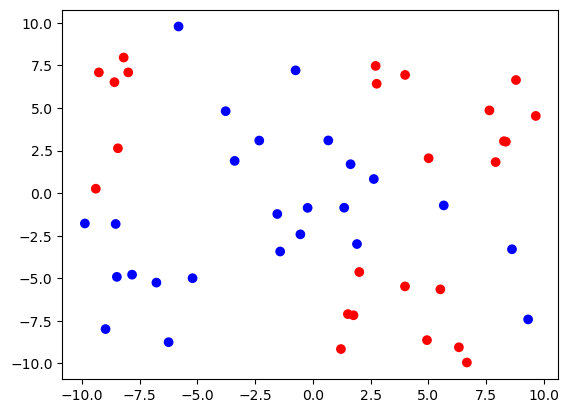

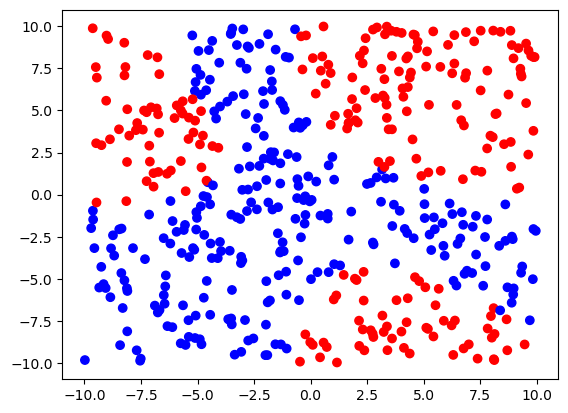

In [2]:
plt.scatter(train.iloc[:,0], train.iloc[:,1], c=label_train)
plt.show()

plt.scatter(test.iloc[:,0], test.iloc[:,1], c=label_test)
plt.show()

Step 1: Training a linear model.

In [3]:
train.insert(0,"x0",[1]*train.shape[0])
test.insert(0,"x0",[1]*test.shape[0])

In [4]:
def check_missing_points(w):
    X = data[['x0', 'x1', 'x2']].values
    hypo_y = np.sign(np.dot(X, w))
    mismatched_indices = np.where(hypo_y != data["y"].values)[0]
    return mismatched_indices.tolist()

def plot_graph(w, data, tit):
    axes = plt.gca()
    color = np.where(data["y"]==1, "red", "blue")
    plt.scatter(list(data['x1']), list(data['x2']), c=color)

    x_vals = np.array(axes.get_xlim())
    y_vals = []
    for i in x_vals:
        y = -w[0]/w[2] - (w[1]/w[2] * i)
        y_vals.append(y)
    plt.plot(x_vals, y_vals, '--')
    plt.title(tit)
    plt.show()

In [5]:
def linearRegression(X,Y):
    XT = np.transpose(X)
    X_pi = np.matmul(np.linalg.inv(np.matmul(XT,X)),XT)
    W = np.matmul(X_pi,Y)
    return W

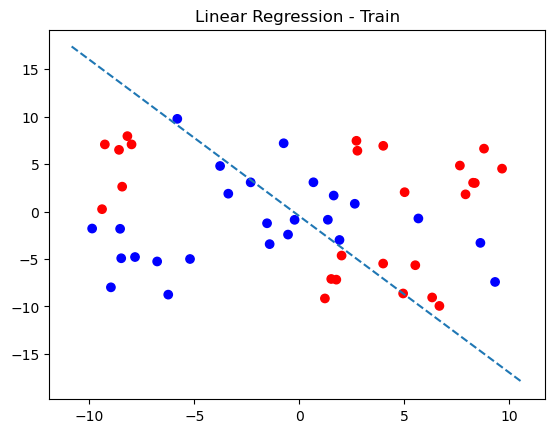

Final Weights (Linear Regression): 0    0.016016
1    0.054144
2    0.032824
dtype: float64 Number of Missclassified Points: 20
Accuracy 40.0 %


In [6]:
X = train.iloc[:,:3]
Y = train.iloc[:,3]
data = train.iloc[:,:4]

W = linearRegression(X,Y)


miss_points = check_missing_points(W)
plot_graph(W, data, "Linear Regression - Train")
print("Final Weights (Linear Regression):", W, "Number of Missclassified Points:", len(miss_points))
print("Accuracy", len(miss_points)/len(X)*100,"%")

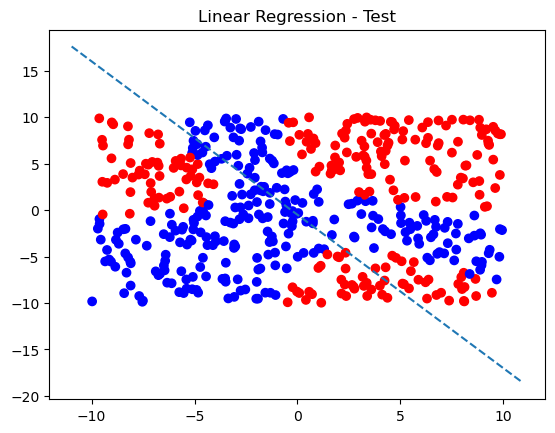

Final Weights (Linear Regression): 0    0.016016
1    0.054144
2    0.032824
dtype: float64 Number of Missclassified Points: 205
Accuracy 41.0 %


In [7]:
data = test.iloc[:,:4]
miss_points = check_missing_points(W)
plot_graph(W, data, "Linear Regression - Test")
print("Final Weights (Linear Regression):", W, "Number of Missclassified Points:", len(miss_points))
print("Accuracy", len(miss_points)/len(data)*100,"%")

[0.         0.0541443  0.03282364]


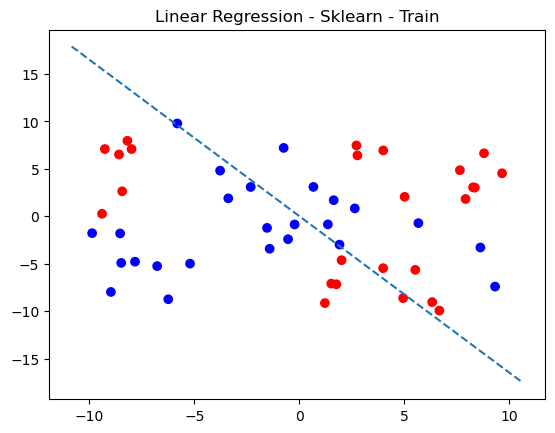

In [8]:
X_train = X
y_train = Y
data = train.iloc[:,:4]
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

y_train_pred_linear = model_linear.predict(X_train)

error_train_linear = mean_squared_error(y_train, y_train_pred_linear)
weights = model_linear.coef_
print(weights)
plot_graph(weights, data, "Linear Regression - Sklearn - Train")

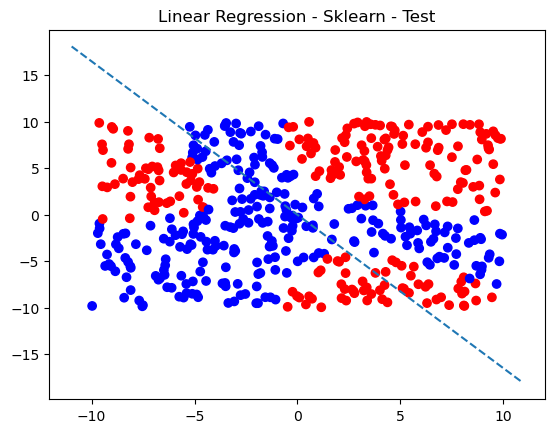

Final Weights (Linear Regression): [0.         0.0541443  0.03282364] Number of Missclassified Points: 197
Accuracy 39.4 %


In [9]:
data = test.iloc[:,:4]
miss_points = check_missing_points(weights)
plot_graph(weights, data, "Linear Regression - Sklearn - Test")
print("Final Weights (Linear Regression):", weights, "Number of Missclassified Points:", len(miss_points))
print("Accuracy", len(miss_points)/len(data)*100,"%")

I implemented my own Linear Regression as well as used LR from the sklearn, they perform almost identically. Have to shift to LR from sklearn due to Singular Matrix Errors

Step 2: Training a linear model using quadratic, 3rd order, and 4th order polynomial transforms.

In [10]:
def calculate_accuracy(y_true, y_pred):
    y_pred_rounded = np.round(y_pred)
    correct_predictions = np.sum(y_true == y_pred_rounded)
    total_samples = len(y_true)
    accuracy = correct_predictions / total_samples
    return accuracy

In [11]:
type(X_train)
X_train = X_train.iloc[:,1:3]

In [12]:
X_test = test.iloc[:,1:3]
y_test = test.iloc[:,3]

In [13]:
def plot_nth_deg_poly(X_train, y_train, label_test):
#     x0_range = np.linspace(X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1, 100)
    x1_range = np.linspace(X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1, 100)
    x2_range = np.linspace(X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1, 100)
#     x0_values, x1_values, x2_values = np.meshgrid(x0_range, x1_range, x2_range)
    x1_values, x2_values = np.meshgrid(x1_range, x2_range)
    X_boundary_poly = poly.transform(np.c_[x1_values.ravel(), x2_values.ravel()])
    
    decision_boundary = model_poly.predict(X_boundary_poly)
    decision_boundary = decision_boundary.reshape(x1_values.shape)

    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=label_test, label='Data')
    plt.contour(x1_values, x2_values, decision_boundary, levels=[0], colors='black', linestyles='dashed', label=f'Decision Boundary (Order {degree})')

    plt.title(f'Validation Data and Decision Boundary (Polynomial Order {degree})')
    plt.xlabel('X1') 
    plt.ylabel('X2')
    plt.legend()
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\somes\AppData\Local\Temp\ipykernel_8472\960266237.py:13: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x1_values, x2_values, decision_boundary, levels=[0], colors='black', linestyles='dashed', label=f'Decision Boundary (Order {degree})')


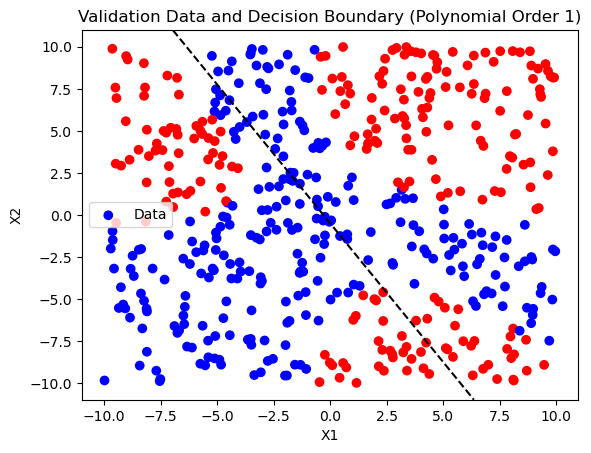

[0.         0.0541443  0.03282364]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\somes\AppData\Local\Temp\ipykernel_8472\960266237.py:13: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x1_values, x2_values, decision_boundary, levels=[0], colors='black', linestyles='dashed', label=f'Decision Boundary (Order {degree})')


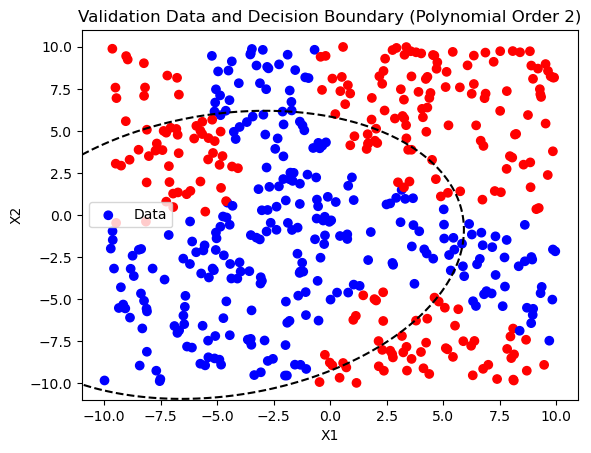

[ 0.          0.06206069  0.03871537  0.00735843 -0.0031886   0.01138622]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\somes\AppData\Local\Temp\ipykernel_8472\960266237.py:13: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x1_values, x2_values, decision_boundary, levels=[0], colors='black', linestyles='dashed', label=f'Decision Boundary (Order {degree})')


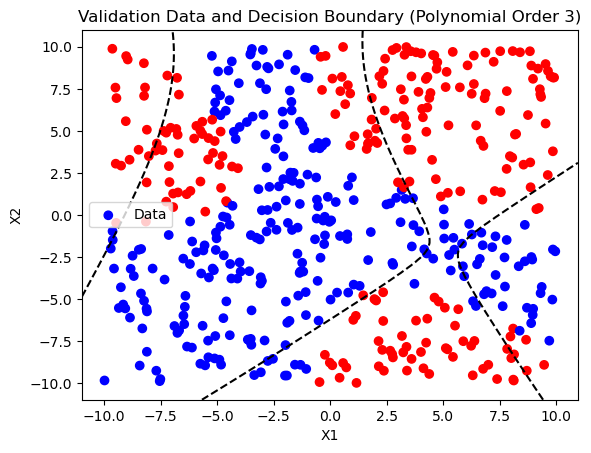

[ 0.          0.20503626 -0.0125593   0.00653621  0.00211267  0.01214956
 -0.00275985  0.00303484  0.00086695 -0.00085512]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\somes\AppData\Local\Temp\ipykernel_8472\960266237.py:13: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x1_values, x2_values, decision_boundary, levels=[0], colors='black', linestyles='dashed', label=f'Decision Boundary (Order {degree})')


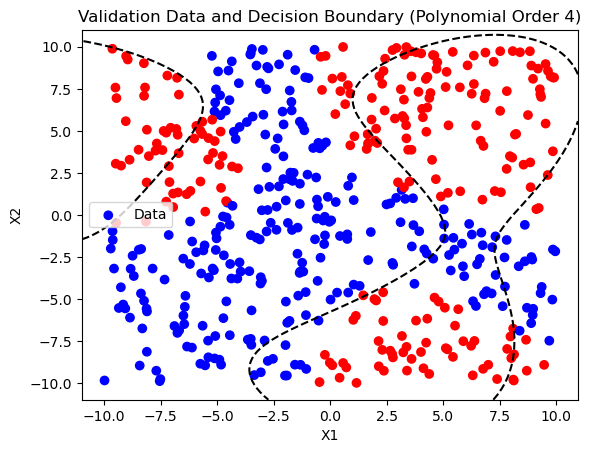

[ 0.00000000e+00  1.90245527e-01  1.80964761e-02  2.95011934e-02
 -1.12004168e-03  4.23306785e-02 -2.53721658e-03  2.73778229e-03
  6.55369159e-04 -1.38915873e-03 -2.13690378e-04 -4.94062150e-06
 -2.21419565e-04  2.80157521e-06 -3.17258964e-04]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\somes\AppData\Local\Temp\ipykernel_8472\960266237.py:13: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x1_values, x2_values, decision_boundary, levels=[0], colors='black', linestyles='dashed', label=f'Decision Boundary (Order {degree})')


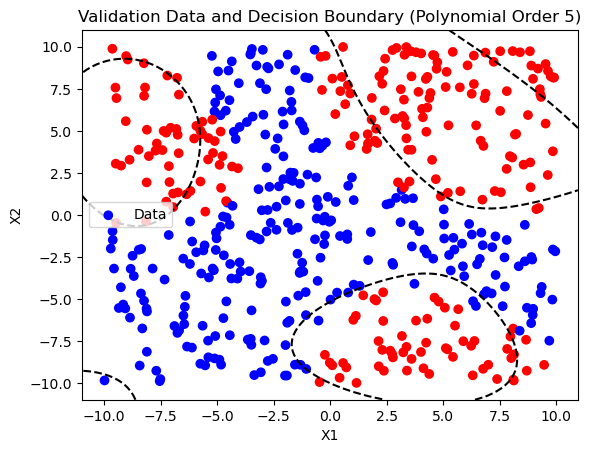

[ 0.00000000e+00  1.37270395e-01 -5.99179297e-02  3.62265533e-02
  6.45215650e-03  3.84105740e-02 -4.07948011e-03  8.06467391e-03
  5.91338081e-03 -1.14607394e-03 -2.63486276e-04 -1.00619771e-04
 -3.27414385e-04 -7.05567590e-05 -2.65293873e-04  2.44333755e-05
 -2.46278199e-05 -4.96179438e-05 -7.25259441e-05 -2.88658437e-05
  1.70766612e-05]


In [14]:
accuracies_train = {}
mse = {}

for degree in range(1,6,1):
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_train_poly = poly.fit_transform(X_train)

    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)

    y_train_pred_poly = model_poly.predict(X_train_poly)

    accuracy_train = calculate_accuracy(y_train, y_train_pred_poly)

    accuracies_train[degree] = [accuracy_train]
    
    X_test_poly = poly.fit_transform(X_test)
    y_test_pred = model_poly.predict(X_test_poly)
    plot_nth_deg_poly(X_test, y_test, label_test)
    acc = calculate_accuracy(y_test, y_test_pred)
    
    train_error = mean_squared_error(y_train, y_train_pred_poly)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    mse[degree] = [train_error]
    mse[degree].append(test_error)
    
    accuracies_train[degree].append(acc)
    print(model_poly.coef_)
    

In [15]:
accuracies_train

{1: [0.26, 0.202],
 2: [0.42, 0.416],
 3: [0.66, 0.55],
 4: [0.8, 0.558],
 5: [0.84, 0.618]}

In [16]:
mse[1]

[0.8669392995099426, 0.8440180255525042]

Step 3: Plotting the training and validation errors by order of polynomial.

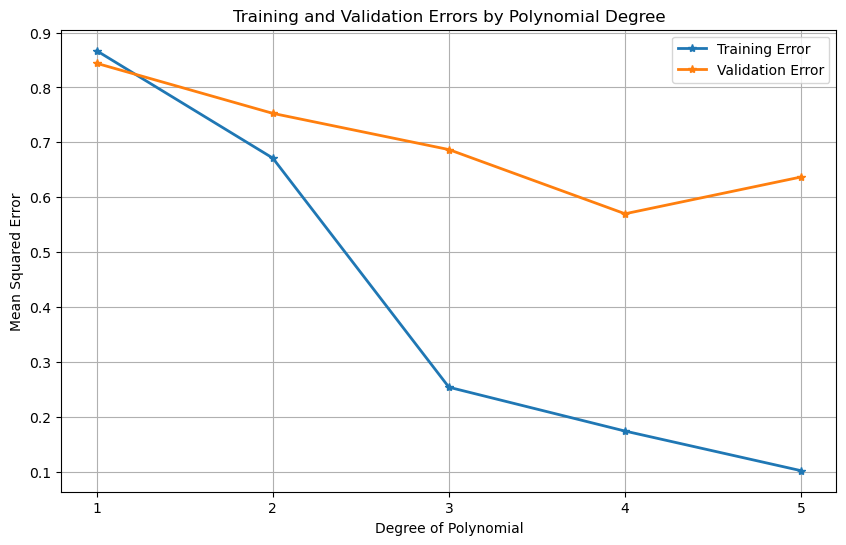

In [17]:
degrees = [1,2,3,4,5]
train_errors = [mse[i][0] for i in degrees]
test_errors = [mse[i][1] for i in degrees]

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error', marker='*', linewidth=2)
plt.plot(degrees, test_errors, label='Validation Error', marker='*', linewidth=2)
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Errors by Polynomial Degree')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()

Step 4: Upon analyzing the results, it appears that the linear model exhibits high training and validation errors, indicating potential underfitting. In contrast, the 4th-degree polynomial model demonstrates the lowest training and validation errors. Consequently, I would opt for the 4th-degree polynomial model due to its better performance in capturing the underlying patterns in the data.